<h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:center; background-color:#ECF0F1; padding:10px; border-radius:10px;">
BENGALURU HOUSE PRICE PREDICTION</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] =(20,10)

In [2]:
df1 = pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1['location'].nunique()

1305

In [4]:
df1.shape

(13320, 9)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
df1.groupby("area_type")["area_type"].agg("count")

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [7]:
df2 = df1.drop(['area_type','availability','balcony','society'],axis='columns')

In [8]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


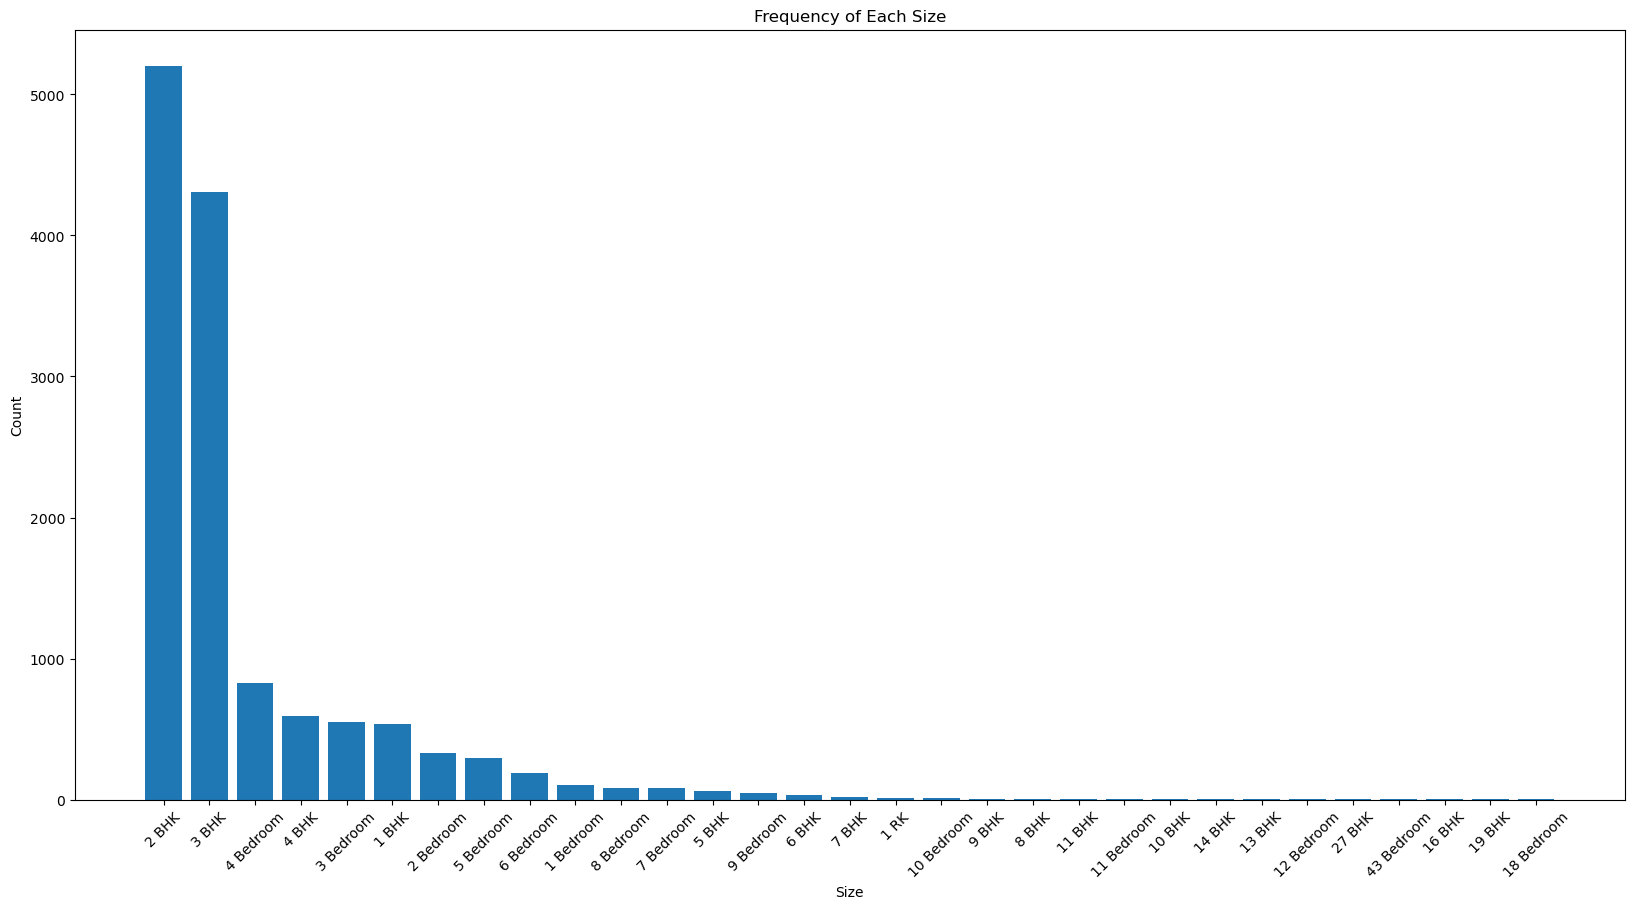

In [9]:
import matplotlib.pyplot as plt

# Count occurrences of each unique value in 'size'
size_counts = df2['size'].value_counts()

# Line plot
plt.bar(size_counts.index, size_counts.values)
plt.xlabel("Size")
plt.ylabel("Count")
plt.title("Frequency of Each Size")
plt.xticks(rotation=45)
plt.show()

In [10]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [11]:
df3 = df2.dropna()
df3.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [12]:
df3.shape

(13246, 5)

In [13]:
df3['size'].unique

<bound method Series.unique of 0            2 BHK
1        4 Bedroom
2            3 BHK
3            3 BHK
4            2 BHK
           ...    
13315    5 Bedroom
13316        4 BHK
13317        2 BHK
13318        4 BHK
13319        1 BHK
Name: size, Length: 13246, dtype: object>

In [14]:
def convert_sqr_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [15]:
df4 = df3.copy()

df4['total_sqft'] = df4['total_sqft'].apply(convert_sqr_to_num)

In [16]:
df4

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00
2,Uttarahalli,3 BHK,1440.0,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00
4,Kothanur,2 BHK,1200.0,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00
13316,Richards Town,4 BHK,3600.0,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00


In [17]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']

In [18]:
df5

,location,size,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,400.00,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,10407.336319


In [19]:
len(df5.location.unique())

1304

In [20]:
df5.location = df5.location.apply(lambda x : x.strip())

location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)

In [21]:
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [22]:
location_stats_lessthan_10 = location_stats[location_stats<=10]
location_stats_lessthan_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [23]:
df5.location = df5.location.apply(lambda x : 'other' if x in location_stats_lessthan_10 else x)

In [24]:
df5.head()
len(df5.location.unique())

242

In [25]:
df5.head()

,location,size,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,4250.000000


In [26]:
df5['BHK'] = df5['size'].apply(lambda x: int(x.split(' ')[0]))

In [27]:
df5.head()

,location,size,total_sqft,bath,price,price_per_sqft,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,3699.810606,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4615.384615,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,4305.555556,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,6245.890861,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,4250.000000,2


In [28]:
df6= df5[~(df5.total_sqft/df5.BHK<300)]


In [29]:
df6.shape

(12502, 7)

In [30]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [31]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m =np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out =pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [32]:
df7 = remove_pps_outliers(df6)
df7.shape

(10241, 7)

In [33]:
def plot_Scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.BHK==2)]
    bhk3 = df[(df.location==location) & (df.BHK==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    pl.scatter(bhk2.total_sqft,bhk2.price_per_sqft, label='2 BHK', s=50)
    pl.scatter(bhk3.total_sqft,bhk3.price_per_sqft,marker = '+', label='3 BHK', s = 50)
    pl.xlabel("Total Sqft area")
    pl.ylabel("price per square Feet")
    pl.legend('location')

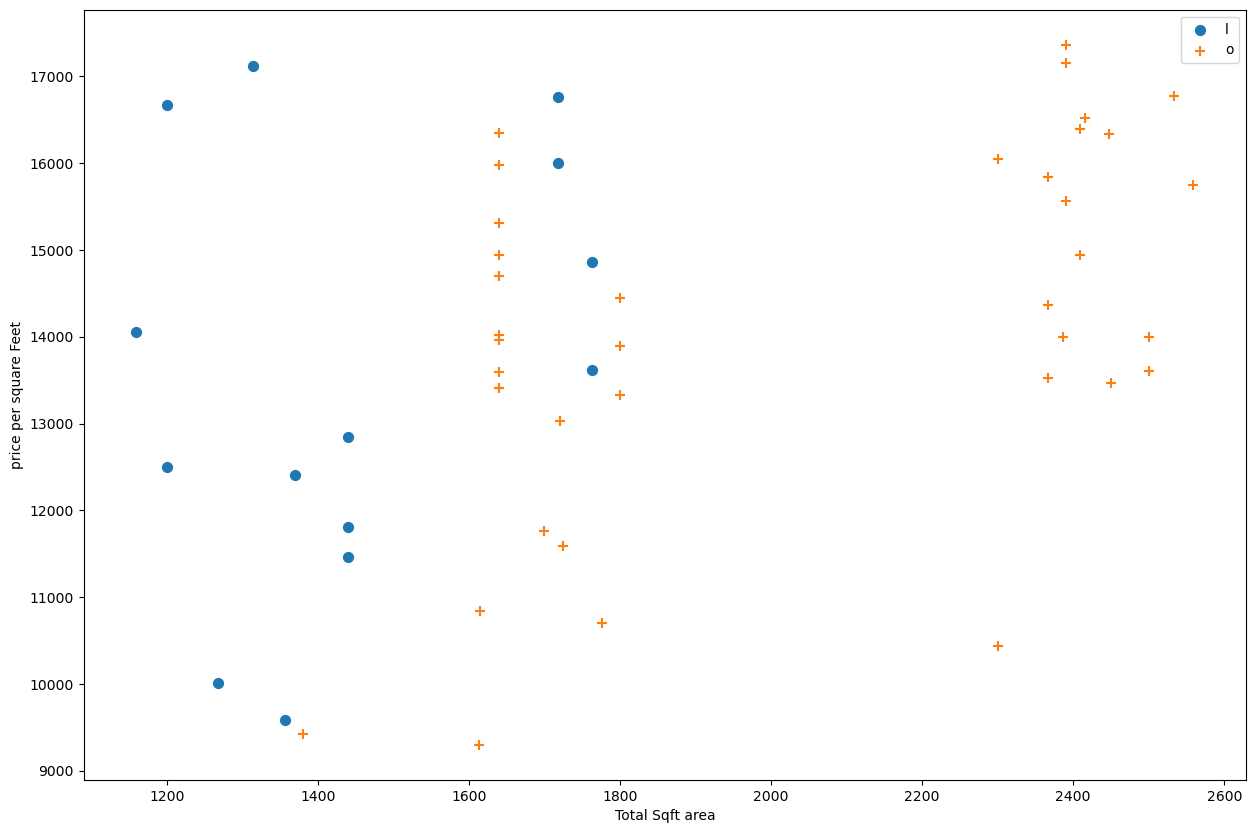

In [34]:
plot_Scatter_chart(df7,"Rajaji Nagar")

In [35]:
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats ={}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean' :np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('BHK'):
            stats= bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
                
        
                                           

In [36]:
df8 = remove_bhk_outliers(df7)
df8

,location,size,total_sqft,bath,price,price_per_sqft,BHK
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,15017.543860,4
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,11901.840491,3
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,12533.333333,3
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,10833.333333,3
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,11983.805668,2
...,...,...,...,...,...,...,...
10232,other,2 BHK,1200.0,2.0,70.0,5833.333333,2
10233,other,1 BHK,1800.0,1.0,200.0,11111.111111,1
10236,other,2 BHK,1353.0,2.0,110.0,8130.081301,2
10237,other,1 Bedroom,812.0,1.0,26.0,3201.970443,1


In [37]:
df9 = df8[df8.bath<df8.BHK+2]
df9

,location,size,total_sqft,bath,price,price_per_sqft,BHK
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,15017.543860,4
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,11901.840491,3
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,12533.333333,3
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,10833.333333,3
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,11983.805668,2
...,...,...,...,...,...,...,...
10232,other,2 BHK,1200.0,2.0,70.0,5833.333333,2
10233,other,1 BHK,1800.0,1.0,200.0,11111.111111,1
10236,other,2 BHK,1353.0,2.0,110.0,8130.081301,2
10237,other,1 Bedroom,812.0,1.0,26.0,3201.970443,1


In [38]:
df10 = df9.drop(['size','price_per_sqft'], axis = 'columns')

df10.head()

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [39]:
dummies =pd.get_dummies(df10.location)

dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [40]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')], axis= 'columns')

In [41]:
df11

,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,1200.0,2.0,130.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,1235.0,2.0,148.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,other,1200.0,2.0,70.0,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10233,other,1800.0,1.0,200.0,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10236,other,1353.0,2.0,110.0,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10237,other,812.0,1.0,26.0,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [42]:
df12= df11.drop('location', axis ='columns')

In [43]:
a = [df12.columns.tolist()]  
df_columns = pd.DataFrame(a)  # Create DataFrame from list
df_columns.to_csv("a.csv", index=False)

In [44]:
x = df12.drop('price', axis = 'columns')

In [45]:
a = (x.columns)

In [49]:
y = df12.price

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
x_train,x_test,y_train,y_test= train_test_split(x,y, random_state =10, test_size = 0.2)

In [52]:
from sklearn.linear_model import LinearRegression
ir_clf = LinearRegression()
ir_clf.fit(x_train,y_train)
ir_clf.score(x_test,y_test)

0.8452277697874311

In [53]:
import joblib

joblib.dump(ir_clf, 'LRmodel.pkl')

['LRmodel.pkl']

In [54]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

cross_val_score(LinearRegression(), x,y, cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [55]:
x.columns

Index(['total_sqft', 'bath', 'BHK', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [56]:
np.where(x.columns=='2nd Phase Judicial Layout')[0][0]

5

In [57]:
def predict_price(location,sqft,bath,BHK):
    loc_index = np.where(x.columns==location)[0][0]
    
    
    a =np.zeros(len(x.columns))
    a[0] = sqft
    a[1] = bath
    a[2] = BHK
    if loc_index >=0:
        a[loc_index] = 1
        
    return ir_clf.predict([a])[0]

In [58]:
predict_price('Indira Nagar',1000,2,2)

C:\Users\chand\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


181.27815484006854

<h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:left; background-color:#ECF0F1; padding:10px; border-radius:10px;">Conculsion: Model has acheived with 84% accuracy</h1>